In [1]:
# the classics
import numpy as np
import matplotlib.pyplot as plt
from random import choices

In [2]:
# helper functions
NEIGHBORS = [[1,0],[-1,0],[0,-1],[0,1]]

def get_probabilities(pos, B, w, neighbors = NEIGHBORS):
    x = np.subtract(B,pos)
    N = len(neighbors)
    cos_t = np.dot(neighbors,x)/(np.linalg.norm(x)*np.linalg.norm(neighbors, axis=1))
    p = 1/N + 1/N * w * cos_t
    return p

def get_neighbors(pos, M = 0, N = 0, backtracks_allowed = True, position_history = []):
    neighbors = []
    if M == 0 or N == 0:
        for delta in NEIGHBORS:
            if check_backtrack(np.add(pos,delta), position_history, backtracks_allowed):
                neighbors.append(delta)
        return neighbors
    
    low = np.array([0,0])
    high = np.array([M-1,N-1])
    
    for delta in NEIGHBORS:
        pos_new = np.add(pos,delta)
        if all(pos_new >= low) and all(pos_new <= high) and check_backtrack(pos_new, position_history, backtracks_allowed):
            neighbors.append(delta)

    return neighbors

def check_backtrack(pos_new, position_history, backtracks_allowed = False):
    if backtracks_allowed:
        return True
    
    # inefficient! better data structures for lookup would be great
    for elem in position_history:
        if np.array_equal(pos_new,elem):
            return False
    
    return True

def visualizer(plot_data,A,B,M=0,N=0):
    if M == 0 or N == 0:
        xmax = max(max(plot_data[0]), B[0])
        xmin = min(min(plot_data[0]), B[0])
        ymax = max(max(plot_data[1]), B[1])
        ymin = min(min(plot_data[1]), B[1])
    else:
        xmax = M-1
        xmin = 0
        ymax = N-1
        ymin = 0        
    
    plt.scatter(plot_data[0],plot_data[1])
    plt.plot(plot_data[0],plot_data[1])

    plt.plot(A[0],A[1],marker='*', markersize = '15', color='green')
    plt.plot(B[0],B[1],marker='*', markersize = '15', color='red')

    plt.xlim(xmin-0.5, xmax+0.5)
    plt.ylim(ymin-0.5, ymax+0.5)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.grid()

In [3]:
# for doing lots of runs
def pathfinder(A, B, M = 0, N = 0, w = 0, backtracks_allowed = True):
    pos = A
    position_history = [np.array(A)]
    step_count = 0
    
    got_stuck = False
    
    while not np.array_equal(pos,B):
        neighbors = get_neighbors(pos, M, N, backtracks_allowed, position_history)

        if not neighbors:
            got_stuck = True
            break

        p = get_probabilities(pos, B, w, neighbors)

        next_step = choices(neighbors,p)[0]
        pos = np.add(pos,next_step)

        position_history.append(pos)
        step_count += 1
      
    return step_count, got_stuck, position_history # better data handling would be cool


Stuck!!!!


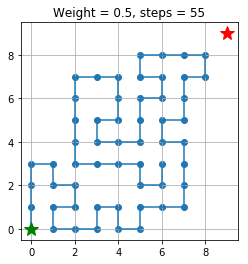

In [4]:
# visualizations, saves individual runs

##### PARAMETERS TO CHANGE #####

# define start (A) and end (B) positions, weight (w)
A = [0,0]
B = [9,9]

# define grid size M x N
# set either to zero to ignore boundaries (untested)
M = 10
N = 10

w = 0.5 # 0 =< w =< 1

backtracks_allowed = False

##### CODE #####

# current position
pos = A
position_history = [np.array(A)]
step_count = 0

while not np.array_equal(pos,B):
    neighbors = get_neighbors(pos, M, N, backtracks_allowed, position_history)
    
    if not neighbors:
        print("Stuck!!!!")
        break
    
    p = get_probabilities(pos, B, w, neighbors)
    
    next_step = choices(neighbors,p)[0]
    pos = np.add(pos,next_step)
    
    position_history.append(pos)
    step_count += 1
    
# matplotlib
plot_data = np.transpose(position_history)
visualizer(plot_data, A,B,M,N)
plt.title("Weight = "+str(w)+", steps = "+str(step_count));

In [ ]:
# collect statistics about a lot of runs
##### PARAMETERS TO CHANGE #####

# define start (A) and end (B) positions, weight (w)
A = [0,0]
B = [4,4]

# define grid size M x N
# set either to 0 to ignore boundaries
M = 5
N = 5

w = 1 # 0 < w < 1

backtracks_allowed = False

n_runs = 1000

##### CODE #####
success_data = []
stuck_data = []

for i in range(n_runs):
    run = pathfinder(A,B,M,N,w,backtracks_allowed)
    step_count = run[0]
    got_stuck = run[1]
    
    # This would be much more elegantly handled by collecting all the data then doing cuts in post :)
    if got_stuck:
        stuck_data.append(step_count)
    else:
        success_data.append(step_count)

In [ ]:
plt.hist(success_data, max(success_data)-min(success_data));
if len(stuck_data)>0: 
    plt.hist(stuck_data, max(stuck_data)-min(stuck_data),color = 'yellow'); # only when backtracking is forbidden
    plt.title("Completed: "+str(len(success_data))+", stuck: "+str(len(stuck_data)))
ax = plt.gca()
ax.locator_params(axis='x', integer=True)
plt.xlim(4,24);
